# EXERCISE 1

Take the dataset from 'housing_california.csv' and load it as a dataframe, then solve the following questions:

1. Eliminate the variables longitude and latitude.
2. Make a *pairs* plot explained by the variable ocean_proximity, whose main plot is a histogram.
3. Analyze the correlation of numerical variables through a heatmap.
4. Analyze the point cloud between total_rooms, total_bedrooms together with its linear regression model.
5. Take the first 1000 rows of the dataframe and represent the population point cloud based on each category of proximity to the ocean.

## SOLUTION

1. Eliminate the variables longitude and latitude.

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("housing_California.csv")

In [2]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
df.drop(['longitude', 'latitude'], axis=1, inplace=True)

2. Make a *pairs* plot explained by the variable ocean_proximity, whose main plot is a histogram.

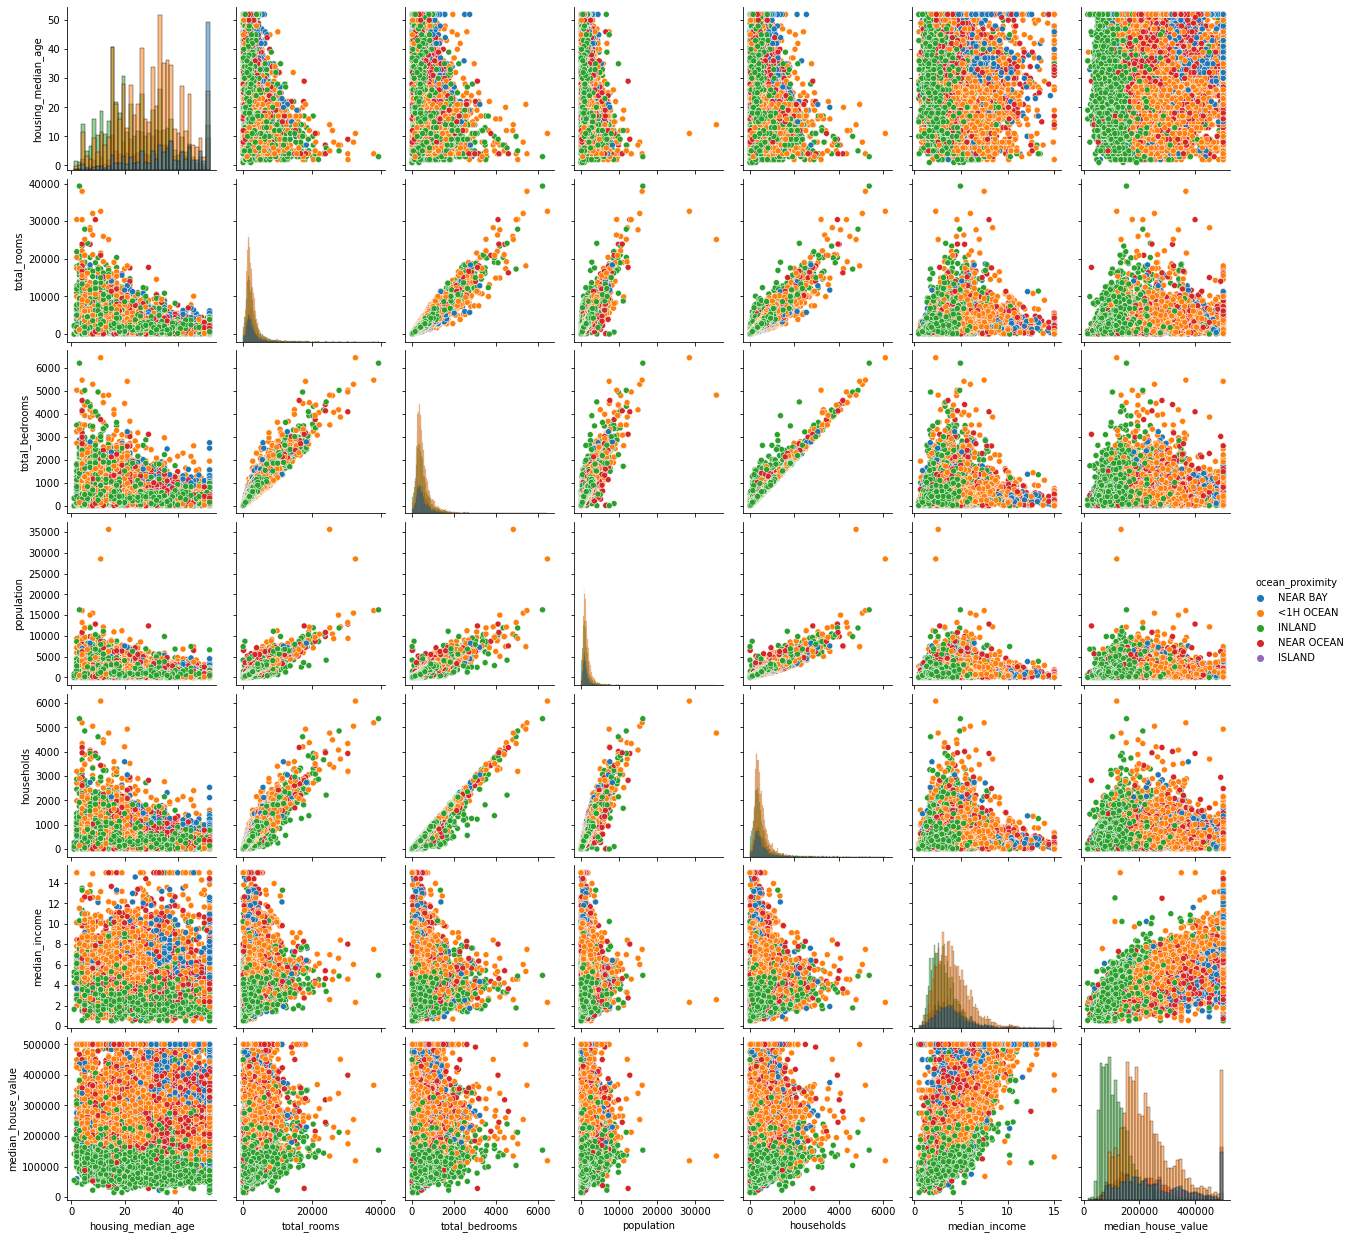

In [4]:
sns.pairplot(data=df, hue='ocean_proximity', diag_kind="hist")

3. Analyze the correlation of numerical variables through a heatmap.

In [5]:
df.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

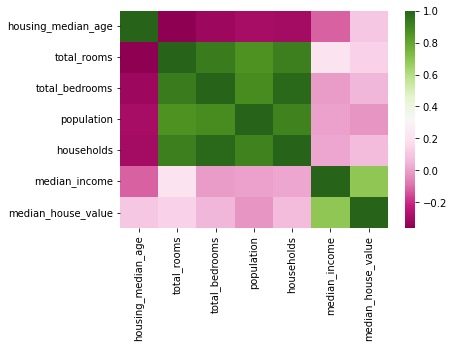

In [6]:
sns.heatmap(df.corr(), cmap="PiYG")

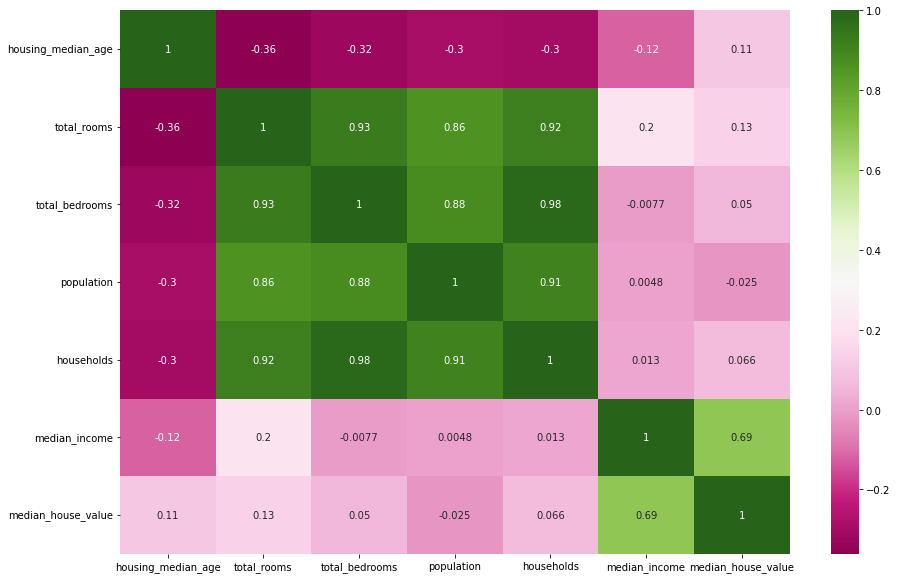

In [7]:
import matplotlib.pyplot as plt

# Increase fig size using matplotlib
fig, ax = plt.subplots(figsize=(15,10))
 

sns.heatmap(df.corr(), cmap="PiYG", annot=True, ax=ax, fmt='.2g')
plt.show()

4. Analyze the point cloud between total_rooms, total_bedrooms together with its linear regression model.

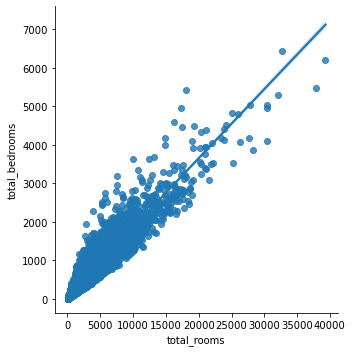

In [8]:
sns.lmplot(data=df, x="total_rooms", y="total_bedrooms")

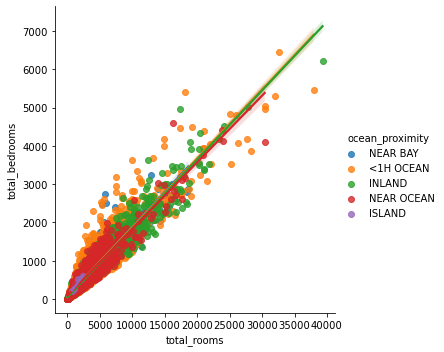

In [9]:
sns.lmplot(data=df, x="total_rooms", y="total_bedrooms", hue = "ocean_proximity")

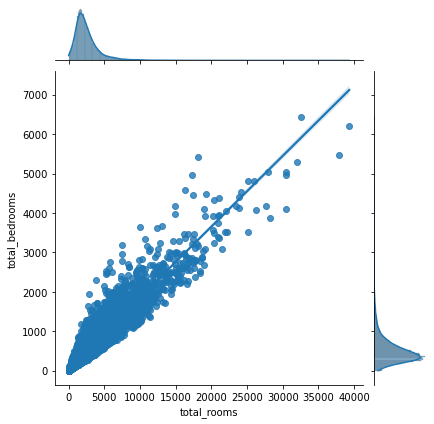

In [10]:
sns.jointplot(data=df, x="total_rooms", y="total_bedrooms", kind='reg')

5. Take the first 1000 rows of the dataframe and represent the histogram population based on each category of proximity to the ocean.

In [11]:
top_mil = df.head(1000).copy()

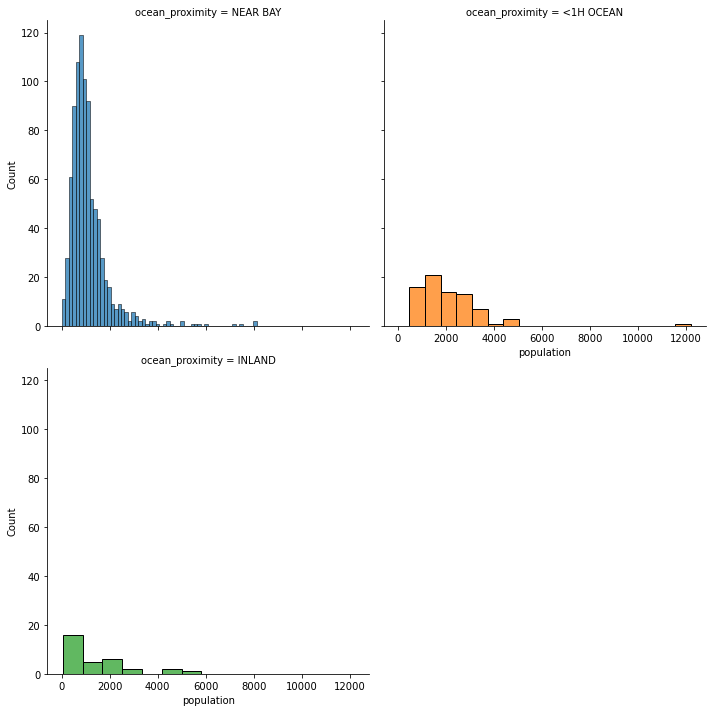

In [12]:
g = sns.FacetGrid(top_mil, col="ocean_proximity", hue = "ocean_proximity", height=5, col_wrap=2)

g.map(sns.histplot, "population")

# EXERCISE 2

Using the Apple Stock csv (AAPL.csv), perform the following visualizations:
* Obtain a bar plot of the first 5 dates of the dataset for the opening and closing prices.
* Makes a cloud of points with the volume of the action and the adjusted closing, it also shows the adjustment line (linear regression), between both variables
* Make a heat map by correlating the dataframe
* Get a histogram by turning off the density function
* Make a graph of the entire time series on the highest and lowest prices, so that the lines are more differentiated, subtract 40 points from all the lowest prices.


## SOLUTION

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('AAPL.csv')

In [15]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000
mean,151.216673,153.017789,149.103336,151.108138,2.151112e+07,140.505248
std,165.485538,166.815882,163.681717,165.277867,1.482164e+07,165.408965
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.380000
25%,24.592500,25.060000,24.092500,24.712500,1.159570e+07,12.020000
50%,85.415000,86.500000,84.355000,85.340000,1.730015e+07,72.410000
75%,198.957500,200.762500,196.027500,198.010000,2.744490e+07,192.572500
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,685.760000


In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-03-01,118.56,132.06,118.50,130.31,38478000,31.68
1,2000-03-02,127.00,127.94,120.69,122.00,11136800,29.66
2,2000-03-03,124.87,128.23,120.00,128.00,11565200,31.12
3,2000-03-06,126.00,129.13,125.00,125.69,7520000,30.56
4,2000-03-07,126.44,127.44,121.12,122.87,9767600,29.87


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3270 non-null   object 
 1   Open       3270 non-null   float64
 2   High       3270 non-null   float64
 3   Low        3270 non-null   float64
 4   Close      3270 non-null   float64
 5   Volume     3270 non-null   int64  
 6   Adj Close  3270 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 179.0+ KB


In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

* Obtain a bar plot of the first 5 dates of the dataset for the opening and closing prices.

In [19]:
df_ten = df[['Date', 'Open', 'Close']].head(5)

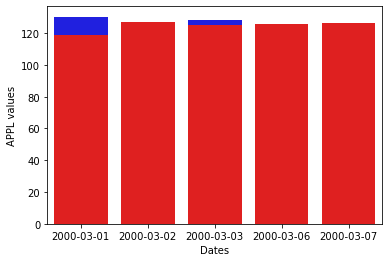

In [20]:
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_ten["Date"], y=df_ten["Close"], color='b')
ax = sns.barplot(x=df_ten["Date"], y=df_ten["Open"], color='r')
 
# renaming the axes
ax.set(xlabel="Dates", ylabel="APPL values")
 
# visualizing illustration
plt.show()

* Makes a scatterplot with the volume of the action and the adjusted closing, it also shows the adjustment line (linear regression), between both variables

<AxesSubplot:xlabel='Volume', ylabel='Adj Close'>

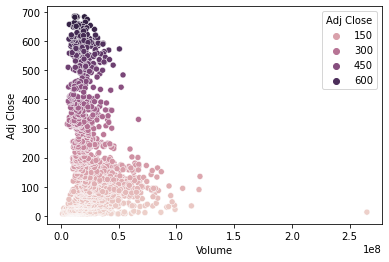

In [21]:
sns.scatterplot(x='Volume', y = 'Adj Close', data = df, hue = "Adj Close")

* Make a heat map by correlating the dataframe

<AxesSubplot:>

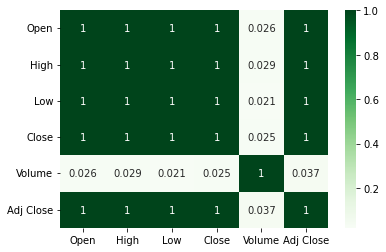

In [22]:
sns.heatmap(df.corr(), cmap='Greens', annot = True)

* Get a histogram by turning off the density function

<AxesSubplot:xlabel='Volume', ylabel='Count'>

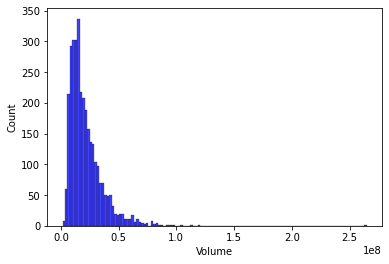

In [23]:
sns.histplot(data=df.Volume, color='blue', kde=False)

* Make a graph of the entire time series on the highest and lowest prices, so that the lines are more differentiated, subtract 40 points from all the lowest prices.

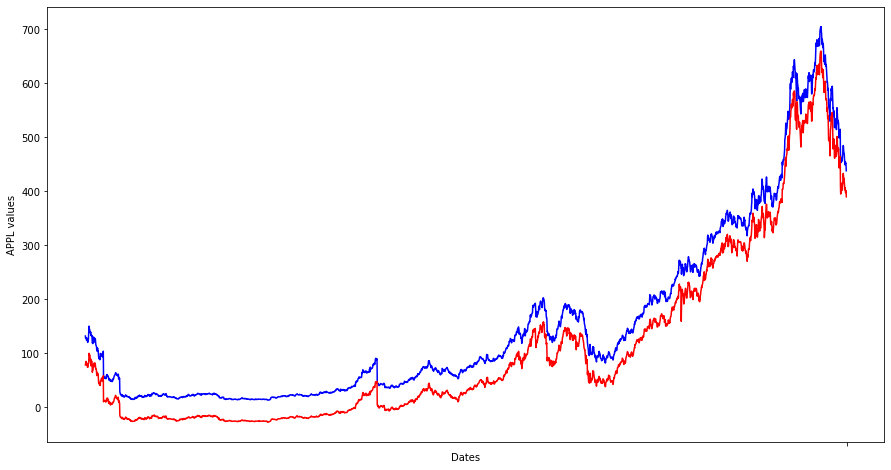

In [24]:
# creating subplots
ax = plt.subplots(figsize=(15,8))
 
# plotting columns
ax = sns.lineplot(x=df["Date"], y=df["High"], color='b')
ax = sns.lineplot(x=df["Date"], y=df["Low"]-40, color='r')
 
# renaming the axes
ax.set(xlabel="Dates", ylabel="APPL values", xticks = "")
 
# visualizing illustration
plt.show()

# EXERCISE 3

Take the dataset heart_disease that include the following columns.

**List of available variables (includes target variable `num`):**

- **age**: continuous
- **sex**: categorical, 2 values {0: female, 1: male}
- **cp** (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
- **restbp** (resting blood pressure on admission to hospital): continuous (mmHg)
- **chol (serum cholesterol level)**: continuous (mg/dl)
- **fbs** (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
- **restecg** (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
- **thalach** (maximum heart rate achieved): continuous
- **exang** (exercise induced angina): categorical, 2 values {0: no, 1: yes}
- **oldpeak** (ST depression induced by exercise relative to rest): continuous
- **slope** (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
- **ca** (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
- **thal**: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
- **num** (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}

Answer the following questions about the data with charts.

01. At what ages do people seek cardiological exams? 
02. Do men seek help more than women? 
03. Examine the variables. How do they relate to one another?
04. What % of men and women seek cardio exams? 
05. Does resting blood pressure increase with age?

## SOLUTION

In [25]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


01. At what ages do people seek cardiological exams? 

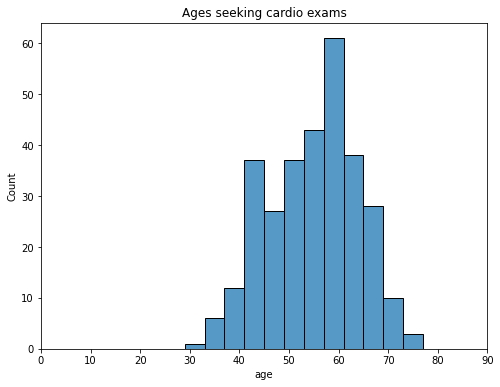

In [28]:
fig, ax = plt.subplots(figsize=(8,6)) 
ax = sns.histplot(df.age, kde=False)
ax.set_xlim(0, 90);
ax.set_title('Ages seeking cardio exams');

02. Do men seek help more than women? 

Text(0.5, 1.0, 'Count of M vs. F who seek cardio examinations')

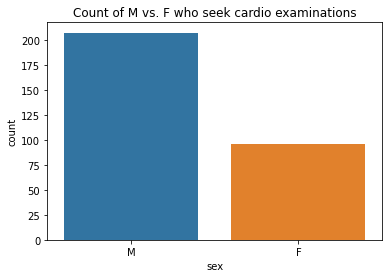

In [29]:
df.replace({'sex': {0.: 'F', 1.: 'M'}}, inplace=True)  

ax = sns.countplot(x="sex", data=df)
ax.set_title('Count of M vs. F who seek cardio examinations')

03. Examine the variables. How do they relate to one another?

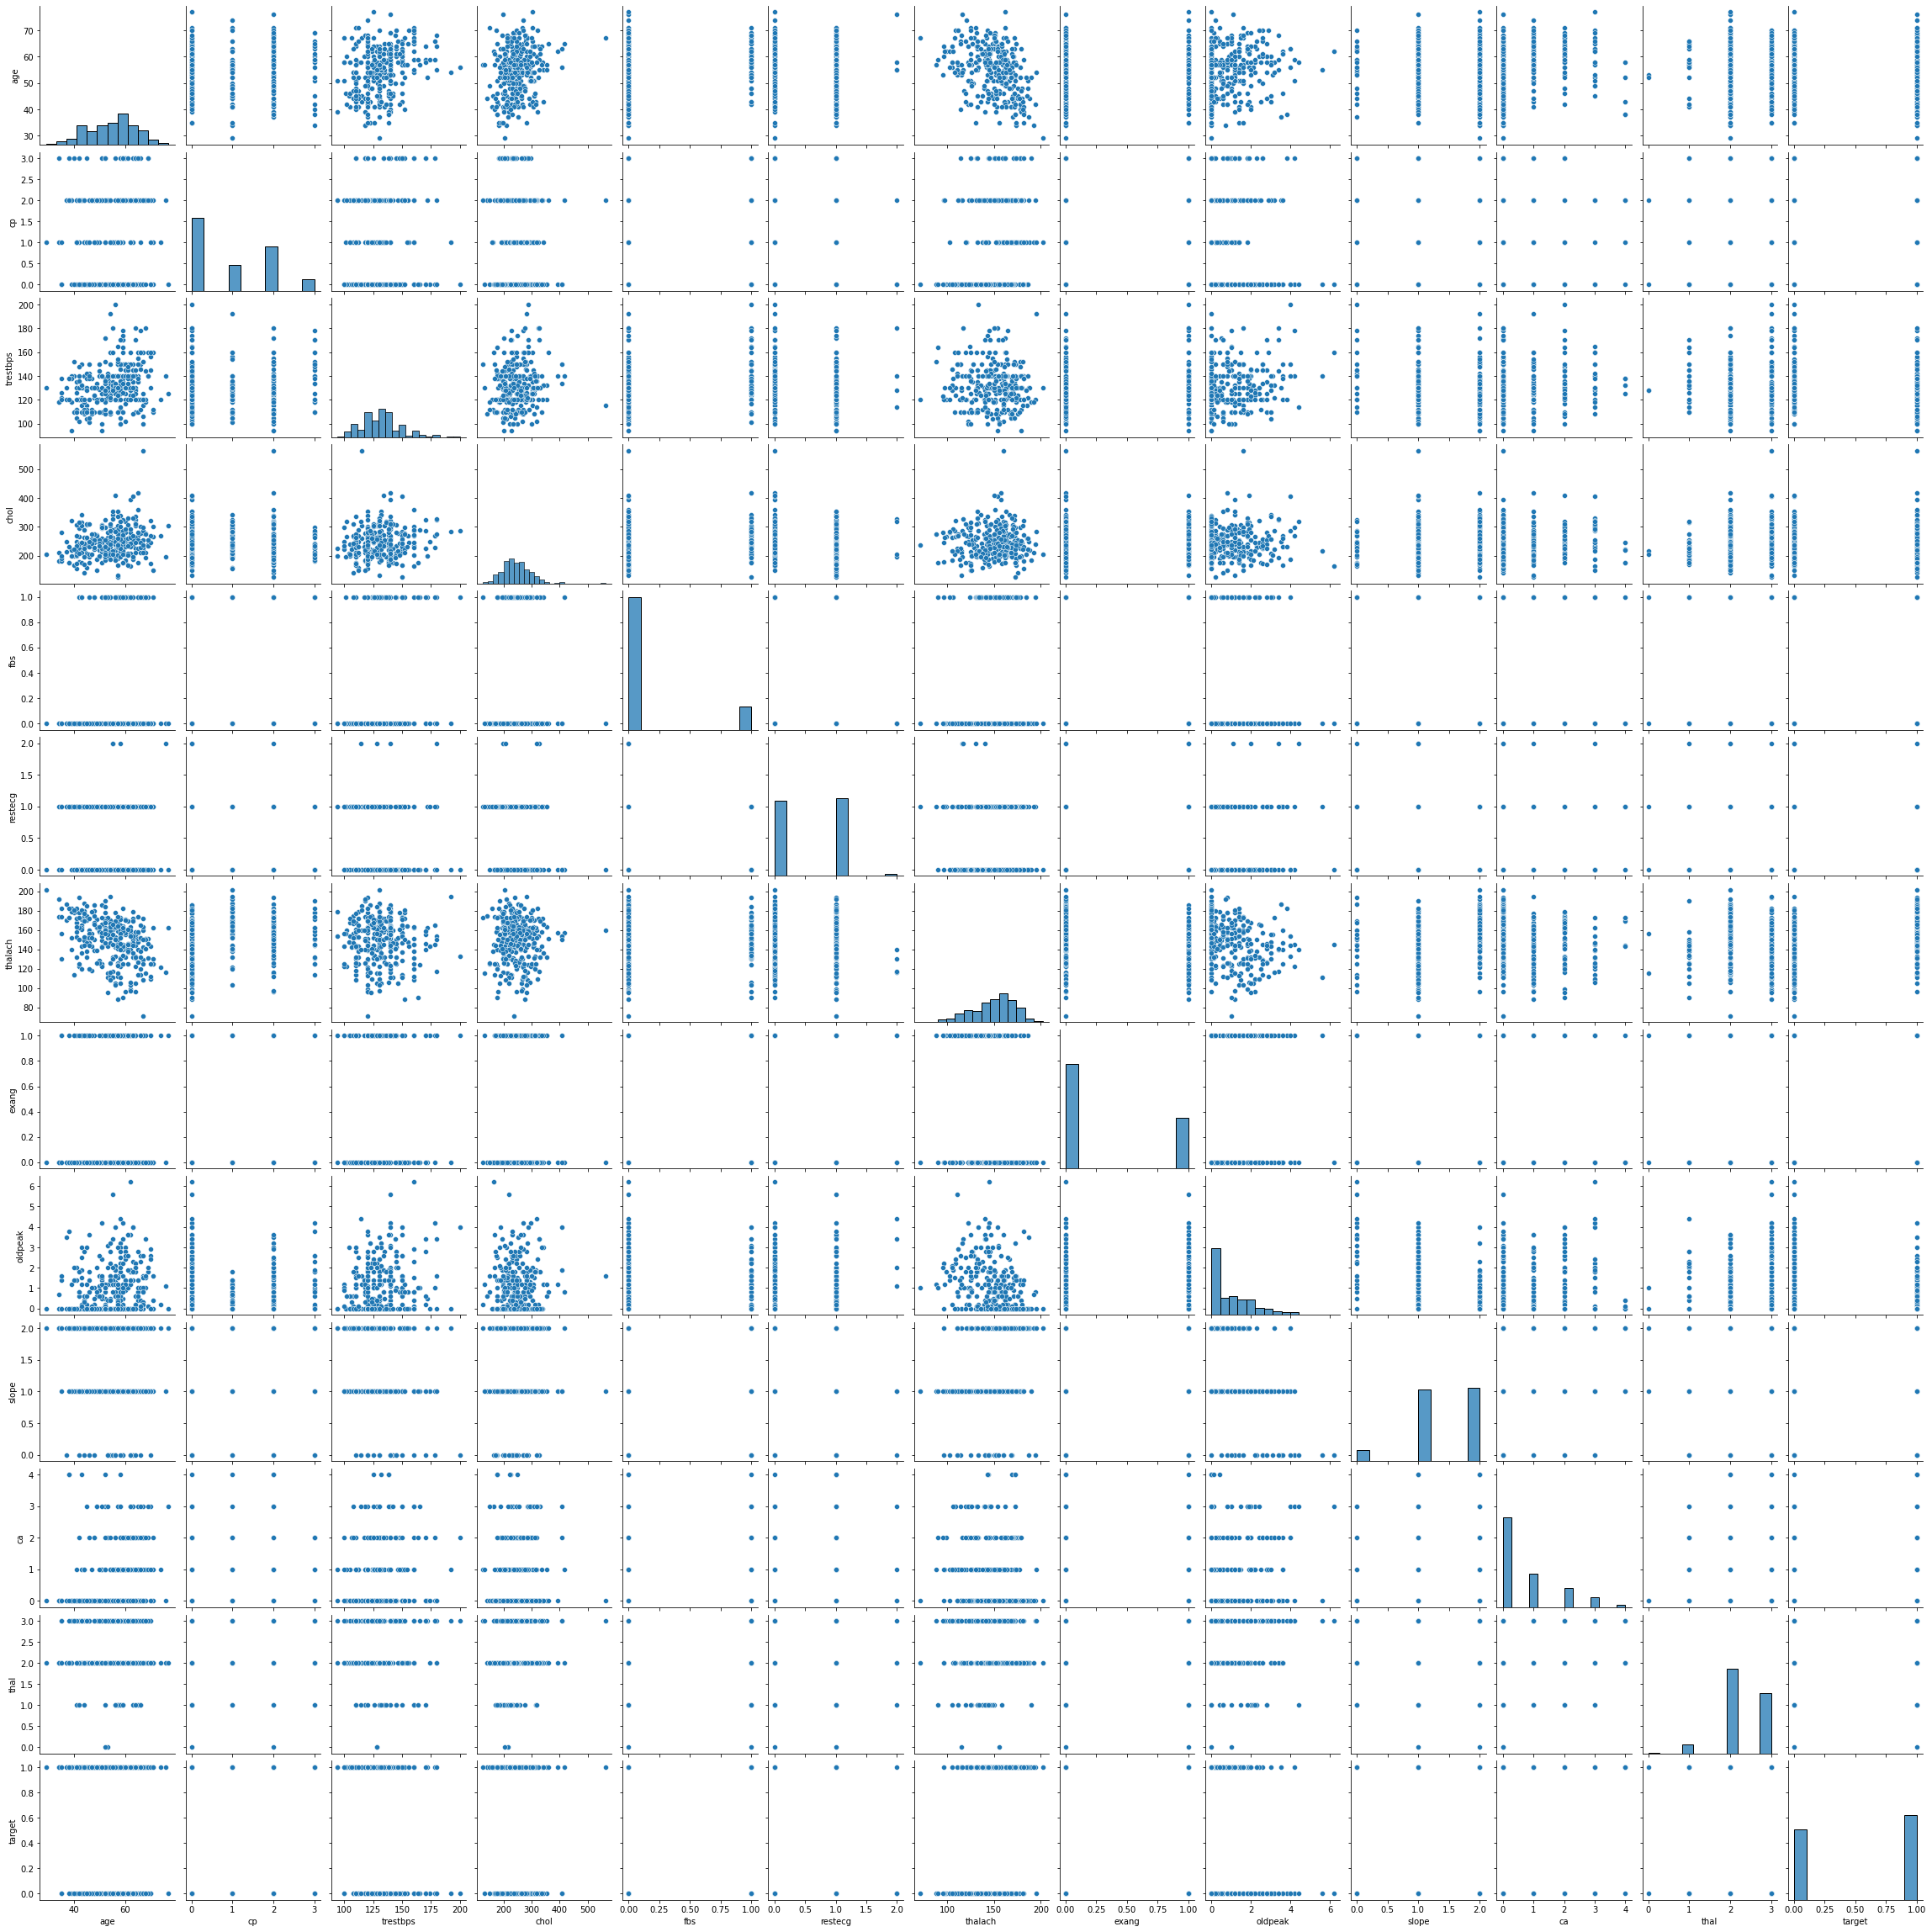

In [30]:
sns.pairplot(df)
plt.show()

04. What % of men and women seek cardio exams? 

In [31]:
per_men = (df.sex.value_counts()[1])/(df.sex.value_counts()[0]+df.sex.value_counts()[1])
per_wom = (df.sex.value_counts()[0])/(df.sex.value_counts()[0]+df.sex.value_counts()[1])

In [32]:
print("% Men {} % Women {}".format(per_men, per_wom))

% Men 0.31683168316831684 % Women 0.6831683168316832


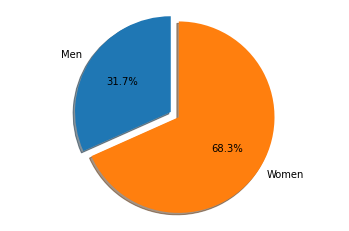

In [33]:
labels = 'Men', 'Women'
explode = (0, 0.1)  # only "explode" the 2nd slice 
sizes = [per_men, per_wom]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

05. Does resting blood pressure increase with age?

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Percentile Distibution for age and rest blood pressure')

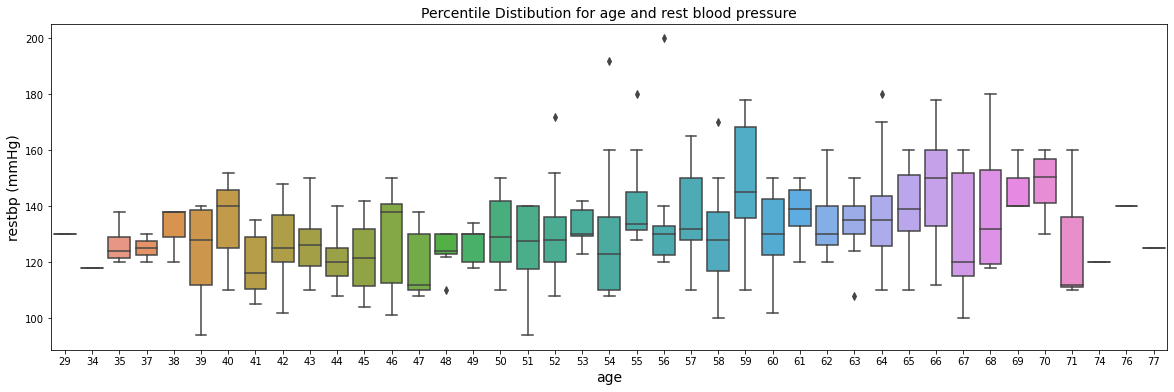

In [35]:
fig, ax = plt.subplots(figsize=(20,6)) 
ax = sns.boxplot(x="age", y="trestbps", data=df)
ax.set_ylabel(None)
ax.set_xlabel('age', fontsize=14)
ax.set_ylabel('restbp (mmHg)', fontsize=14)
ax.set_title('Percentile Distibution for age and rest blood pressure', fontsize=14)

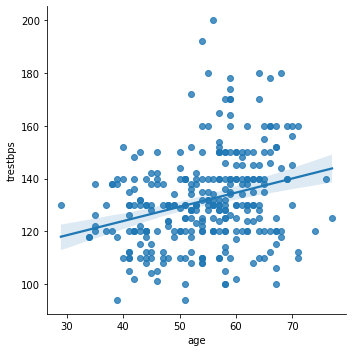

In [36]:
sns.lmplot(data = df, x = "age", y = "trestbps")